In [1]:
import pandas as pd
import datetime
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
def date(x): 
    return x.date()

def timestamp_to_string(time): 
    return time.strftime("%d/%m/%Y")

In [3]:
def transient_grouping(df, duration_max): 
    return  df[df['duration']==duration_max]

In [4]:
def duration_grouping(df, duration_min, duration_max): 
    return df[(df['duration']>duration_min) & (df['duration']<=duration_max)]

In [5]:
feather_folder_path = 'C:\\transients'

In [6]:
#can read in from hard drive, just a lot slower!!
#path = 'D:\\211208_GM_processed_data\monthly_data'
#aug_loud = pd.read_feather(path + '\\2018_08' + '.feather')

In [7]:
#import monthly files, only events that are flagged as loud
aug_loud = pd.read_feather(r'C:\transients' + '\\2018_08' + '.feather')
sep_loud = pd.read_feather(r'C:\transients' + '\\2018_09' + '.feather')
oct_loud = pd.read_feather(r'C:\transients' + '\\2018_10' + '.feather')
nov_loud = pd.read_feather(r'C:\transients' + '\\2018_11' + '.feather')
dec_loud = pd.read_feather(r'C:\transients' + '\\2018_12' + '.feather')
jan_loud = pd.read_feather(r'C:\transients' + '\\2019_01' + '.feather')
feb_loud = pd.read_feather(r'C:\transients' + '\\2019_02' + '.feather')
mar_loud = pd.read_feather(r'C:\transients' + '\\2019_03' + '.feather')
apr_loud = pd.read_feather(r'C:\transients' + '\\2019_04' + '.feather')
may_loud = pd.read_feather(r'C:\transients' + '\\2019_05' + '.feather')

In [8]:
#import monthly files, keeping only the average noise for each TOL band across the whole month 
aug  = len(pd.read_feather(r'C:\monthly_data' + '\\2018_08' + '.feather'))
sep  = len(pd.read_feather(r'C:\monthly_data' + '\\2018_09' + '.feather'))
oct  = len(pd.read_feather(r'C:\monthly_data' + '\\2018_10' + '.feather'))
nov  = len(pd.read_feather(r'C:\monthly_data' + '\\2018_11' + '.feather'))
dec  = len(pd.read_feather(r'C:\monthly_data' + '\\2018_12' + '.feather'))
jan  = len(pd.read_feather(r'C:\monthly_data' + '\\2019_01' + '.feather'))
feb  = len(pd.read_feather(r'C:\monthly_data' + '\\2019_02' + '.feather'))
mar  = len(pd.read_feather(r'C:\monthly_data' + '\\2019_03' + '.feather'))
apr  = len(pd.read_feather(r'C:\monthly_data' + '\\2019_04' + '.feather'))
may  = len(pd.read_feather(r'C:\monthly_data' + '\\2019_05' + '.feather'))

In [9]:
month_array = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']  #for monthly labels 
lenth_array = [aug, sep, oct, nov, dec, jan, feb, mar, apr, may]

#empty lists 
short_array = [] 
med_short_array = []
med_array = []
long_array = []

count = 0 
for month in [aug_loud, sep_loud, oct_loud, nov_loud, dec_loud, jan_loud, feb_loud, mar_loud, apr_loud, may_loud]:
    #length = len(month)
    length = lenth_array[count] 
    
    #create dataframes 
    df_short = transient_grouping(month, 0.5)
    df_med_short = duration_grouping(month, 0.5, 5)
    df_med = duration_grouping(month, 5, 180)
    df_long = duration_grouping(month, 180, 1200)
    
    #calculate percentages
    proportion_short = (len(df_short)/length)*100   #percentage as transients 
    proportion_med_short = (len(df_med_short)/length)*100   #percentage as non transients 
    proportion_med = (len(df_med)/length)*100   #percentage as non transients 
    proportion_long = (len(df_long)/length)*100   #percentage as non transients 
    
    #calculate percentages
    #proportion_short = len(df_short)  #percentage as transients 
    #proportion_med_short = len(df_med_short)  #percentage as non transients 
    #proportion_med = len(df_med) #percentage as non transients 
    #proportion_long = len(df_long)   #percentage as non transients 

    #append to empty array 
    short_array.append(proportion_short)
    med_short_array.append(proportion_med_short)
    med_array.append(proportion_med)
    long_array.append(proportion_long)
    
    count = count + 1

#add values to dataframe 
bar_data = pd.DataFrame({'Month':month_array, 
                         'Proportion of short transients': short_array, 
                         'Proportion of medium short events': med_short_array, 
                         'Proportion of medium events': med_array, 
                         'Proportion of long events': long_array})

In [10]:
#read in data 
ice_data = pd.read_csv(r'C:\Users\hjh44\OneDrive - University of Bath\Masters Project\Python\IceProfiler\Ice_data.csv')
ice_data['Date'] = pd.to_datetime(ice_data['Date'], dayfirst=True)  #change to datetime format 

In [11]:
def return_month(x): 
    x.month 

ice_data['month'] = np.nan
for i in range(0, len(ice_data)): 
    ice_data.loc[i, 'month'] = ice_data.loc[i, 'Date'].month
    
monthly_ice_draft = ice_data.groupby(by='month', sort=False).mean()
monthly_ice_draft = monthly_ice_draft.iloc[:-3]
ice_draft = np.array(monthly_ice_draft['Ice Profiler'])
bar_data = bar_data.drop(index=0)
bar_data['Ice draft'] = ice_draft
bar_data.head()

,Month,Proportion of short transients,Proportion of medium short events,Proportion of medium events,Proportion of long events,Ice draft
1,Sep,0.071631,0.054319,0.017586,0.000411,-0.036249
2,Oct,0.179678,0.086731,0.027404,0.000000,0.058218
3,Nov,0.658853,0.202471,0.062231,0.000000,0.452721
4,Dec,0.901574,0.295553,0.038610,0.000000,0.719427
5,Jan,1.299257,0.433075,0.025825,0.000000,1.039574


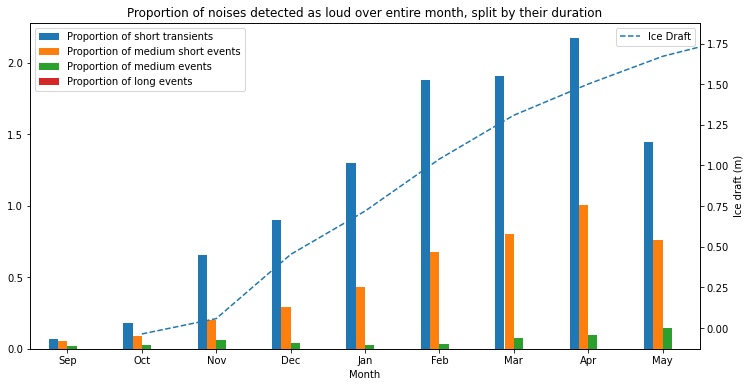

In [12]:
bar_data.drop(['Ice draft'], axis=1).plot(x='Month', kind='bar', figsize=(12, 6))
bar_data['Ice draft'].plot(secondary_y=True, ls='--', label='Ice Draft')
plt.ylabel('Ice draft (m)')
plt.title('Proportion of noises detected as loud over entire month, split by their duration')
plt.legend()
plt.show()

In [13]:
bar_data.drop('Ice draft', axis=1, inplace=True)

Text(0.5, 1.0, 'Proportion of "loud" noises with respect to entire month, split into durations')

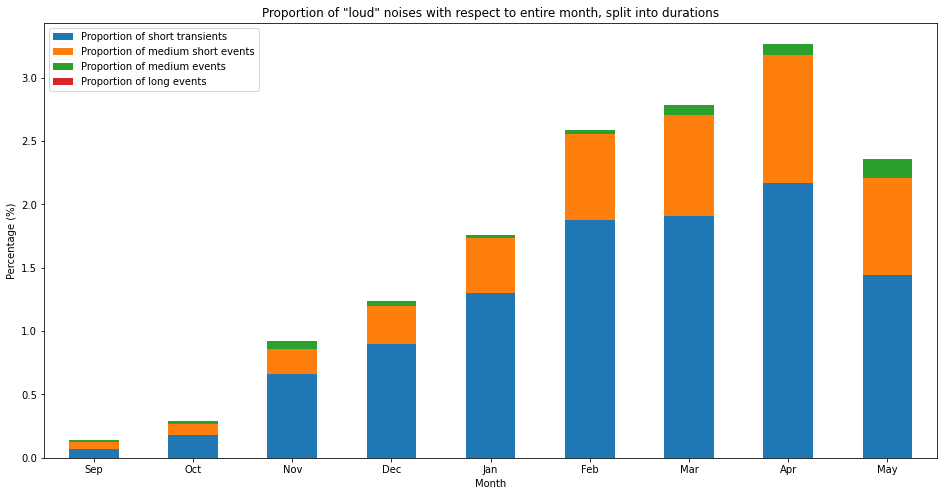

In [14]:
#plotting
ax = bar_data.plot.bar(x='Month', rot=0, figsize=(16, 8), stacked=True)
plt.ylabel('Percentage (%)')
plt.title('Proportion of "loud" noises with respect to entire month, split into durations')

In [15]:
#frequencies as floats
#freq = sep.drop(['broadband_spl', 'background', 'loud', 'transient', 'timestamp'], axis=1).columns.to_numpy()
#freq = freq.astype(np.float)

#freq_new = [] 
#for i in range(0, len(freq)): 
#    value = int(freq[i])
#    freq_new = np.append(freq_new, value)

In [16]:
#append dataframe of groupby for each month into one for entire year!!! using for loop, groupby as above then append the 'by day' dataframe

In [17]:
def groupby_day(df): 
    df['date'] = df['timestamp'].apply(date) 
    
    #new dataframe for groupby of each day. Groupby with sum for Boolean columns is equal to count of number of True (tested)

    df_by_day = df.groupby(by='date').sum()   
    df_by_day.reset_index(inplace=True)
    
    return pd.DataFrame({'Date':df_by_day['date'], 'number of events':df_by_day['loud']})

In [18]:
df_short = (transient_grouping(aug_loud, 0.5))

In [19]:
month_array = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']  #for monthly labels 

#empty lists 
yearly_short_array = pd.DataFrame({})
yearly_med_short_array = pd.DataFrame({})
yearly_med_array = pd.DataFrame({})
yearly_long_array = pd.DataFrame({})

count = 0 
for month in [aug_loud, sep_loud, oct_loud, nov_loud, dec_loud, jan_loud, feb_loud, mar_loud, apr_loud, may_loud]:
    month_name = month_array[count]
    print(month_name + ': Longest loud noise event within month: %d' % (month['duration'].max()))

    #create dataframes 
    df_short = transient_grouping(month, 0.5)
    df_med_short = duration_grouping(month, 0.5, 5)
    df_med = duration_grouping(month, 5, 180)
    df_long = duration_grouping(month, 180, 1200)
    
    #print number of each events 
    print('number of short transients : %d' % len(df_short))
    print('number of medium short events : %d' % len(df_med_short))
    print('number of medium events: %d' % len(df_med))    
    print('number of long events : %d' % len(df_long))


    
    #grouped by day 
    daily_short = groupby_day(df_short)
    daily_med_short = groupby_day(df_med_short)
    daily_med = groupby_day(df_med)
    daily_long = groupby_day(df_long)
    
    #append for whole year 
    yearly_short_array = yearly_short_array.append(daily_short)
    yearly_med_short_array = yearly_med_short_array.append(daily_med_short)
    yearly_med_array = yearly_med_array.append(daily_med)
    yearly_long_array = yearly_long_array.append(daily_long)
    
    count = count +1
    
import warnings
warnings.simplefilter(action='ignore')


Aug: Longest loud noise event within month: 389
number of short transients : 5678
number of medium short events : 4290
number of medium events: 1632
number of long events : 43
Sep: Longest loud noise event within month: 452
number of short transients : 2615
number of medium short events : 1983
number of medium events: 642
number of long events : 15
Oct: Longest loud noise event within month: 176
number of short transients : 6360
number of medium short events : 3070
number of medium events: 970
number of long events : 0
Nov: Longest loud noise event within month: 107


<ipython-input-17-b78c07a0d9db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['timestamp'].apply(date)
<ipython-input-17-b78c07a0d9db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['timestamp'].apply(date)
<ipython-input-17-b78c07a0d9db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

number of short transients : 10439
number of medium short events : 3208
number of medium events: 986
number of long events : 0
Dec: Longest loud noise event within month: 96
number of short transients : 27204
number of medium short events : 8918
number of medium events: 1165
number of long events : 0
Jan: Longest loud noise event within month: 112
number of short transients : 42361
number of medium short events : 14120
number of medium events: 842
number of long events : 0


<ipython-input-17-b78c07a0d9db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['timestamp'].apply(date)
<ipython-input-17-b78c07a0d9db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['timestamp'].apply(date)
<ipython-input-17-b78c07a0d9db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

Feb: Longest loud noise event within month: 168
number of short transients : 44242
number of medium short events : 15876
number of medium events: 724
number of long events : 0
Mar: Longest loud noise event within month: 151
number of short transients : 59690
number of medium short events : 25137
number of medium events: 2326
number of long events : 0


<ipython-input-17-b78c07a0d9db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['timestamp'].apply(date)


Apr: Longest loud noise event within month: 124
number of short transients : 37558
number of medium short events : 17385
number of medium events: 1617
number of long events : 0
May: Longest loud noise event within month: 420


<ipython-input-17-b78c07a0d9db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['timestamp'].apply(date)


number of short transients : 43686
number of medium short events : 23093
number of medium events: 4431
number of long events : 4


<ipython-input-17-b78c07a0d9db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['timestamp'].apply(date)


<AxesSubplot:xlabel='timestamp'>

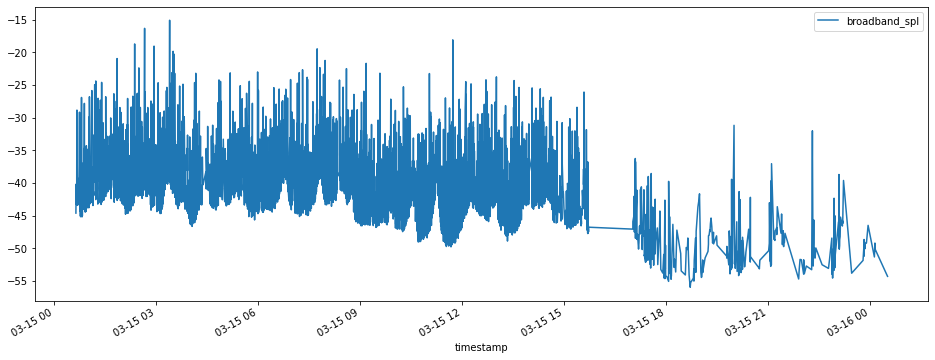

In [21]:
mar_short = transient_grouping(mar_loud, 0.5)
mar_short = mar_short[(mar_short['timestamp'] > pd.to_datetime('2019-03-15 00:39:13.944')) & (mar_short['timestamp'] < pd.to_datetime('2019-03-16 00:39:13.944'))]
mar_short.plot('timestamp', 'broadband_spl', figsize=(16, 6))

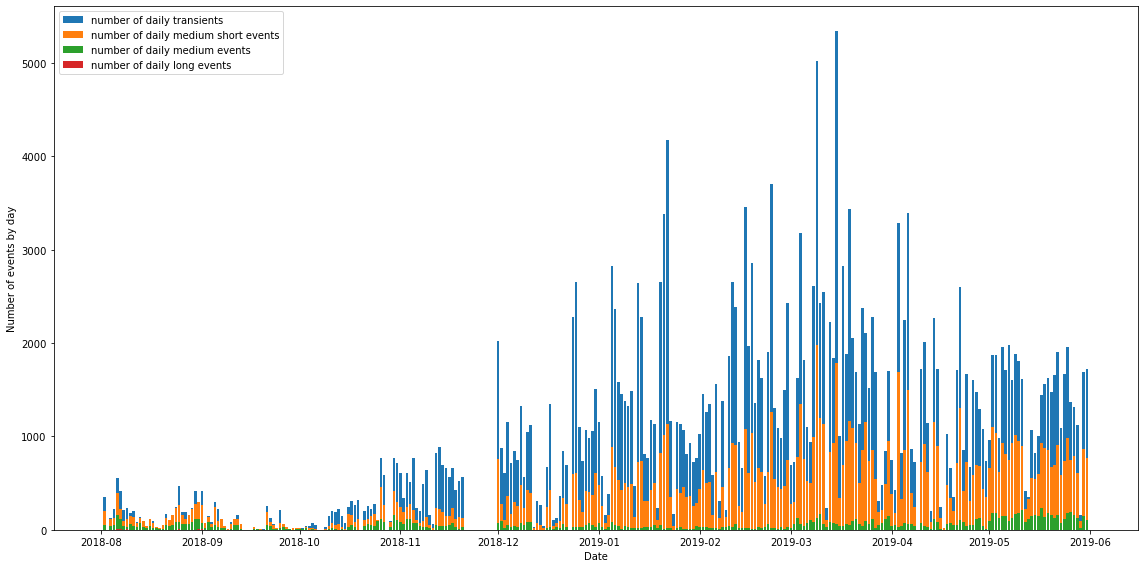

In [22]:
fig, ax = plt.subplots(figsize=(16,8))

ax.bar(yearly_short_array['Date'], yearly_short_array['number of events'], label='number of daily transients')
ax.bar(yearly_med_short_array['Date'], yearly_med_short_array['number of events'], label='number of daily medium short events')
ax.bar(yearly_med_array['Date'], yearly_med_array['number of events'], label='number of daily medium events')
ax.bar(yearly_long_array['Date'], yearly_long_array['number of events'], label='number of daily long events')

#ax.scatter(yearly_short_array['Date'], yearly_short_array['number of events'], label='number of daily transients', c='r')
#ax.scatter(yearly_med_short_array['Date'], yearly_med_short_array['number of events'], label='number of daily medium short events', c='g')
#ax.scatter(yearly_med_array['Date'], yearly_med_array['number of events'], label='number of daily medium events', c='b')
#ax.scatter(yearly_long_array['Date'], yearly_long_array['number of events'], label='number of daily long events', c='orange')


ax.legend(loc='upper left')
ax.set_ylabel('Number of events by day')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()


In [23]:
yearly_short_array

,Date,number of events
0,2018-08-02,347
1,2018-08-04,122
2,2018-08-05,222
3,2018-08-06,559
4,2018-08-07,411
...,...,...
26,2019-05-27,1313
27,2019-05-28,1121
28,2019-05-29,159
29,2019-05-30,1687


In [24]:
yearly_short_array.to_csv('daily_number_transients.csv')

In [25]:
yearly_med_short_array.to_csv('daily_number_med_short.csv')

In [26]:
yearly_med_array.to_csv('daily_number_medium.csv')

In [27]:
yearly_long_array.to_csv('daily_number_long.csv')

In [30]:
may_long = duration_grouping(may_loud, 180, 1200)
may_long

,25,32,40,50,63,79,100,126,158,200,...,12589,15849,19953,25119,filename,timestamp,broadband_spl,background_spl,loud,duration
34105,102.698257,96.446335,96.730171,92.255966,98.539566,101.690109,100.420357,100.292450,98.969971,97.879654,...,59.995361,59.787327,60.565269,57.588963,ICLISTENHF1266_20190515T163216.989Z_TOL_1sHann...,2019-05-15 16:34:58.989,-37.393136,-50.950565,True,181.0
35894,121.287338,117.689529,113.772568,108.206505,111.368431,114.867905,111.349922,109.141510,107.272575,111.591080,...,63.502537,61.871758,61.691021,58.002754,ICLISTENHF1266_20190516T145433.007Z_TOL_1sHann...,2019-05-16 14:58:22.007,-22.005385,-38.375865,True,303.5
35941,113.956802,112.097717,115.663101,118.183136,113.616592,118.959885,113.481438,108.332993,113.219223,113.839119,...,66.032806,64.844269,63.751747,59.845154,ICLISTENHF1266_20190516T163944.007Z_TOL_1sHann...,2019-05-16 16:43:57.007,-21.406829,-31.787782,True,420.0
38141,89.253044,95.611526,98.267265,101.141510,95.798546,100.553528,100.495316,105.189507,108.839180,107.784523,...,58.846676,59.654823,60.554371,57.637207,ICLISTENHF1266_20190517T163615.937Z_TOL_1sHann...,2019-05-17 16:38:51.937,-32.913571,-44.378989,True,223.0
